In [41]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## PDEs: Heat Equation

See Chapter 20 of your textbook. The basic form is

$$\frac{\partial u}{\partial t} - k \frac{\partial^2 u}{\partial x^2} = 0, \quad k>0$$

* a parabolic PDE, as opposed to the elliptic (Laplace) or hyperbolic (wave) equations, and
* the techniques developed will be useful for the time-dependent Schrödinger equation.

#### Why is this called the Heat Equation?

Consider a mass with temperature field $T({\bf x},t)$, specific heat $C$, and mass density, $\rho$. The rate of heat flow is given by:

$$\frac{\partial Q}{\partial t} = \int_V C\rho({\bf x}) \frac{\partial T({\bf x}, t)}{\partial t} d{\bf x}$$ 

* sign: $\frac{\partial Q}{\partial t} < 0$ is a heat flow *out* of the system.

The heat current $\bf H$ is 

$$\textbf{H} =- K \mathbf{\nabla} T(\mathbf{x}, t), \quad K>0$$

where the flow direction is opposite the temperature gradient (steepest ascent) and $K$ is the thermal conductivity of the material.

Put these together: integrate the heat current over the surface and pay attention to consistency of the signs:

$$\int_V C\rho \frac{\partial T}{\partial t} d{\bf x} = \oint_S K {\bf \nabla} T \cdot {\bf n} \; dS$$

where ${\bf n}$ is normal to the surface, pointing outward. 

Using the divergence theorem:

$$\int_V C\rho \frac{\partial T}{\partial t} d{\bf x} = \int_V {\bf \nabla} \cdot (K{\bf \nabla}T) \; d{\bf x}$$

The integrals are over the same volume, so:

$$\frac{\partial T({\bf x},t)}{\partial t} = \frac{K}{C\rho} \nabla^2 T({\bf x},t)$$

Voilà: the heat equation in multiple dimensions.

In one dimension, 

$$\frac {\partial T(x,t)}{\partial t} = \frac{K}{C\rho}
\frac{\partial ^2 T(x,t)}{\partial x^2}$$

As usual, boundary conditions determine the solution. 
* Example: the surface (or end, in 1-D) is held at a constant temperature.
* An arbitrary initial condition ($T(x,0)=0$, for example) can be used to get things started.

### Heat Equation Numerical Solution

Based on experience with Laplace's equation, try a finite-difference approach on a lattice, solving for $T(x_i, t_j)$ on the lattice sites. Some things are different here:
* the vertical dimension of the grid is time (see below)
* unlike Laplace's equation, the orders of the two derivatives are different, so we will check the numerical stability of the solution.
* we do not know the $T$ values at the bottom of the lattice (large $t$ values). That's what we are trying to find. We will assume that we know the temperatures for some early time $t$, so that we can get the solution started.

    $=>$ we will have to use a **stepping method** instead of an iterative relaxation. 

Use a forward-difference approximation for the time derivative of the temperature:

$$\frac{\partial T(x,t)}{\partial t} \simeq \frac{T(x,t+\Delta t)-
T(x,t)}{\Delta t}$$

For the spatial derivatives, we know the spatial variation of the temperature along the
entire top row (initial condition) and the left and right sides (boundary conditions).
* As we did with the Laplace equation, we first use the more accurate "central-difference" (aka midpoint) approximation for the space derivative:

$$
\frac{\partial^2 T(x,t)}{\partial x^2} \simeq \frac{T(x +\Delta
x,t) -2 T(x,t) +T(x-\Delta x,t)}{(\Delta x)^2}$$

Substituting these approximations into the heat difference equation

$$\frac{T(x,t+ \Delta t)-T(x,t)}{\Delta t} = \frac{K}{C\rho}
\frac{T(x+\Delta x,t) -2 T(x,t)+T(x-\Delta x,t) }{(\Delta
x)^2}$$

The final step is to rewrite the equation in terms of the points on the $(i,j)$ discrete grid.

$$
 \boxed{T_{i,j+1} = T_{i,j}+ \eta
\left[T_{i+1,j}-2T_{i,j}+T_{i-1,j}\right], \quad \eta  = \frac{K
\Delta t}{C\rho (\Delta x)^2}}$$

Notes:
* With ODEs, we used notation like $T_i^{(j)}$ for *iterations*, but now we are using $T_{i,j}$ because time is treated as a dimension on the grid.
* As planned, we use the points from a previous time step $t_{j}$ to find the current value at time $t_{j+1}$.

<img src="Figures/Figure_20.2.png" width="50%">

(Aside: Our textbook describes this algorithm as the "*leapfrog* algorithm", but that's confusing: there is a *leapfrog* algorithm for ODE solving, wherein the velocity and position updates are interleaved: position is updated from $t$ to $t + h$ and velocity is updated from $t-h/2$ to $t+h/2$. This is sometimes also called the [velocity Verlet](https://en.wikipedia.org/wiki/Leapfrog_integration) method, mentioned in Lectures2.ipynb, and it has some attractive properties.)


------
------

**EXAMPLE**: Initially, a bar of length 1 meter is at a uniform temperature of 100 C, and then both ends are placed in contact with ice water at 0 C.


Working, wait for figure...
eta = 0.09602194787379972
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


<IPython.core.display.Javascript object>


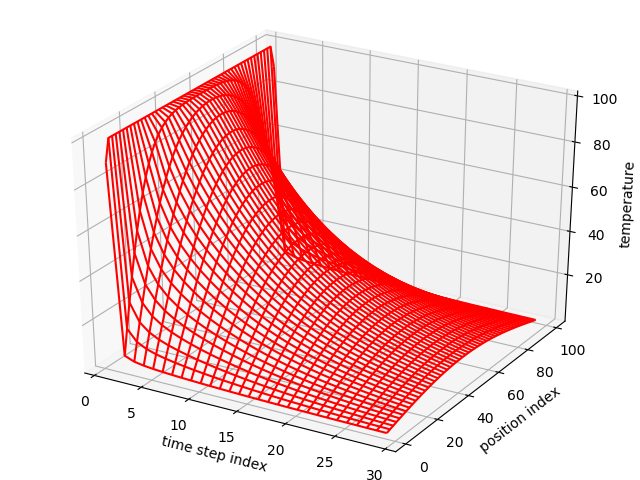

finished with time index showing every 1000 steps


In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
% matplotlib notebook 
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D 

nevery=1000 # plot every nevery steps
Nx = 101
Nt = 30000    
Dx = 0.03     
Dt = 1.0                                                              
KAPPA = 210. # conductivity
SPH = 900.   # specific heat
RHO = 2700.  # density
T = np.zeros((Nx, 2))
Tpl = np.zeros((Nx, 31))  
                                     
print("Working, wait for figure...")

for ix in range (1, Nx - 1):  T[ix, 0] = 100.0  # Initial T
T[0,0] = 0. 
T[0,1] = 0.                           # 1st & last T = 0
T[Nx-1,0] = 0.
T[Nx-1,1] = 0.
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx)
print('eta =', cons)
m = 1

for t in range (1, Nt):                                  
   for ix in range (1, Nx - 1):                       
      T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
   if t==1 or t%nevery == 0:         # print and plot progress every 1000 steps
        for ix in range (1, Nx - 1, 2): 
            Tpl[ix, m] = T[ix, 1]  # save values for plotting
        print(m)   
        m = m + 1                        
   for ix in range (1, Nx - 1):
      T[ix, 0] = T[ix, 1] 
x = list(range(1, Nx - 1, 2))         # Plot alternate x pts, for clarity
y = list(range(1, 30))                       
X, Y = plt.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tpl)              
fig = plt.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(Y, X, Z, color = 'r')                    
ax.set_xlabel('time step index')                                     
ax.set_ylabel('position index')
ax.set_zlabel('temperature')
plt.show()                               
print("finished with time index showing every %d steps" %nevery)


Due to the cold reservoirs on both ends, the entire bar cools toward a uniform temperature $T=0$. 
* Might be fun to animate this and run longer.
* See section 20.3 of your textbook

## Von Neumann Stability Assessment

The parameter $\eta$ controls the change of $T$ as time steps from $t_j$ to $t_{j+1}$.

$$\eta  = \frac{K\Delta t}{C\rho (\Delta x)^2}$$

We can control the ratio $\Delta t/(\Delta x)^2$


The steps $\Delta t$ and $\Delta x$ should be sufficiently small, but **also** well matched.

Rewriting the evolution equation

$$T_{i,j+1} =
\eta T_{i+1,j}+ (1-2\eta) T_{i,j}+ \eta T_{i-1,j}, \quad \eta  = \frac{K
\Delta t}{C\rho (\Delta x)^2}$$

it turns out that the condition for a stable numerical solution is 

$$\eta \le \frac{1}{2}$$

(The proof is given in the textbook in Chapter 20.2.3, and is also shown below). We'll discuss this issue in more detail next time, too.

This condition, for the heat equation, implies

$$\begin{align}
\frac{1}{2} &\geq \frac{K \Delta t}{C\rho (\Delta x)^2} \\
\frac{C\rho}{2K}(\Delta x)^2 &\geq \Delta t \\
\end{align}$$

Bottom line:

* Making the time step $\Delta t$ smaller will always improve the stability, as we would expect.
* **But** if we decrease the space step $\Delta x$ without a simultaneous *quadratic* decrease in the time step, we will worsen the stability. 

The space-time asymmetry here arises from our use of stepping forward (iterating) in time, but not in space.

For the calculation above, we had $\Delta x= 0.03$, $\Delta t=1.0$, $\frac{C\rho}{2K}=5.8\times 10^3$, so the condition was met by a margin of about a factor 5. 

Put another way, we had $\eta=0.096$ (we have the code print this), and the condition for stability is $\eta \le 0.5$.

Thus, reducing $\Delta x$ by a factor 3 without changing $\Delta t$ will cause an instability.

Explore: repeat the calculation with different step values, following the above guideline, and see how the solution evolves or fails. Try at least these sets:
* Dx = 0.03, Dt = 1.0
* Dx = 0.01, Dt = 1.0
* Dx = 0.03, Dt = 5.0
* Dx = 0.03, Dt = 6.0

To zoom in on the earlier part of the evolution, below I set the nevery parameter to 100 (instead of 1000) and the number of time steps is reduced by a factor 10 relative to what we had above. 

Things go really badly when the stability condition isn't obeyed! Notice the vertical axis.

Working, wait for figure...
eta = 0.21604938271604937
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


<IPython.core.display.Javascript object>


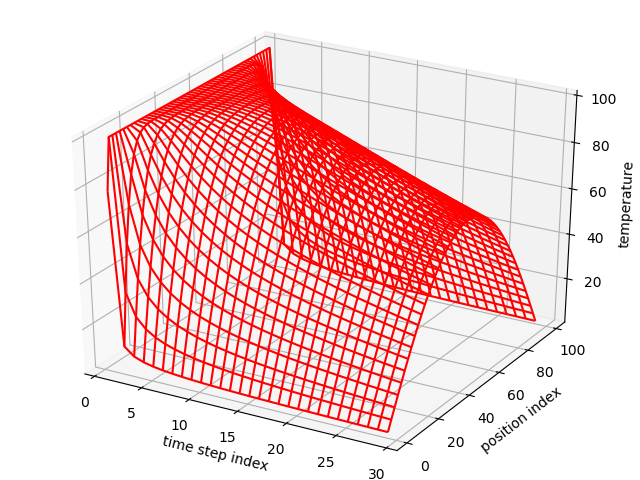

finished with time index showing every 100 steps


In [8]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# EqHeat.py: solves heat equation via finite differences, 3-D plot
% matplotlib notebook 
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D 

nevery=100
Nx = 101
Nt = 3000     
Dx = 0.02    
Dt = 1.                                                            
KAPPA = 210.
SPH = 900.
RHO = 2700.
T = np.zeros( (Nx, 2) )
Tpl = np.zeros( (Nx, 31) )  
                                     
print("Working, wait for figure...")

for ix in range (1, Nx - 1):  T[ix, 0] = 100.0;
T[0,0] = 0.
T[0,1] = 0.
T[Nx-1,0] = 0.
T[Nx-1,1] = 0.
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx)
print('eta =', cons)
m = 1

for t in range (1, Nt):                                  
   for ix in range (1, Nx - 1):                       
      T[ix, 1] = T[ix, 0] +  cons*(T[ix+1, 0] + T[ix-1, 0] - 2.*T[ix,0])                                                        
   if t==1 or t%nevery == 0:              # print progress every 100 steps
        for ix in range (1, Nx - 1, 2): Tpl[ix, m] = T[ix, 1]   
        print(m)   
        m = m + 1                        
   for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1] 
x = list(range(1, Nx - 1, 2))         # Plot alternate x pts, for clarity
y = list(range(1, 30))                       
X, Y = plt.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tpl)              
fig = plt.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(Y, X, Z, color = 'r')                    
ax.set_xlabel('time step index')                                     
ax.set_ylabel('position index')
ax.set_zlabel('temperature')
plt.show()                               
print("finished with time index showing every %d steps" %nevery)




-------
-------

Whence comes the stability condition on $\eta$? We'll use your book's notation, but modify the discussion for clarity.

Posit that the eigenmodes of the solution are of the form:

$$T_{m,j}=\xi^j(k)e^{ikm\Delta x}$$

where $k$ is the wave number, and we changed the first (the space) index to $m$ to avoid confusion with $i=\sqrt{-1}$, and to add confusion the $\xi(k)$ in the book have their index displayed as a superscript. Recall, $x=m\Delta x$ and $t=j\Delta t$.

See how those modes evolve by plugging this form into the boxed stepping function above, yielding (in two lines):

$$\xi^{j+1}=\xi^j\;[ 1 + 2\eta (\cos\theta -1)]$$

where $\theta=k\Delta x$.

Thus, in each time step the value of $\xi$ is changed by the factor in the $[ ]$. We therefore require for every mode ($k$) that

$$ | \; [ 1 + 2\eta (\cos\theta -1)] \; | \le 1$$

so that mode doesn't grow without bound. As $\eta>0$, this means the worst case is when $\cos\theta=-1$, implying that

$$|1-4\eta |\le 1$$ 

or

$$\eta \le \frac{1}{2}$$.


This matches our experimentation above.

----
---
Aside: the Crank-Nicolson Method
* See Section 20.4 of your textbook. 
* more complex, but much faster.
---
---

Onward to wave equations...